# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [62]:
from bs4 import BeautifulSoup
from splinter import Browser
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.


In [64]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

In [65]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html)

In [66]:
# Extract all rows of data
all_table_row_elements = soup.select("table.table > tbody > tr.data-row")  # skips header row
print(len(all_table_row_elements))

1867


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [67]:
# Create an empty list
table_data = []
# Loop through the scraped data to create a list of rows
for row_element in all_table_row_elements:
    row_data = []
    for td in row_element.select("td"):
        row_data.append(td.text)
    table_data.append(row_data)

# this value should be the same as the number from extracting all the rows
print(len(table_data))

1867


In [68]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(table_data, columns=["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])

In [69]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis


In [70]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [71]:
# Change data types for data analysis
df = df.astype({"id": int,
                "terrestrial_date": "datetime64[ns]",
                "sol": int,
                "ls": int,
                "month": int,
                "min_temp": float,
                "pressure": float})

In [72]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

In [74]:
# 1. How many months are there on Mars?
df["month"].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [84]:
# 2. How many Martian days' worth of data are there?

# each sol is a day on Mars, so we want the number of unique days
len(df["sol"].unique())

1867

There are 12 Martian months.

There are 1,867 Martian days of data in the table.

### Temperature

In [76]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = df.groupby("month").agg({"min_temp": "mean"})
average_low_temp_by_month

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


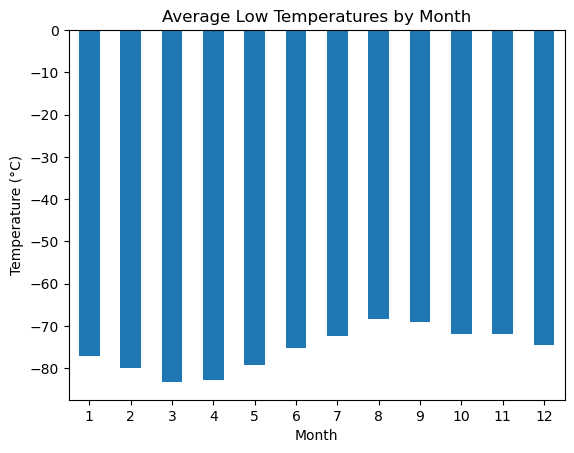

In [77]:
# Plot the average temperature by month
average_low_temp_by_month.plot.bar(title="Average Low Temperatures by Month",
                                   xlabel="Month", ylabel="Temperature (°C)",
                                   legend=False, rot=0)
plt.show()

In [78]:
# Identify the coldest and hottest months in Curiosity's location
average_low_temp_by_month.sort_values("min_temp")

,min_temp
month,
3,-83.307292
4,-82.747423
2,-79.932584
5,-79.308725
1,-77.160920
6,-75.299320
12,-74.451807
7,-72.281690
11,-71.985507


The coldest month is **Month 3** and the warmest is **Month 8**.

### Pressure

In [79]:
# 4. Average pressure by Martian month
average_pressure_by_month = df.groupby("month").agg({"pressure": "mean"})
average_pressure_by_month

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


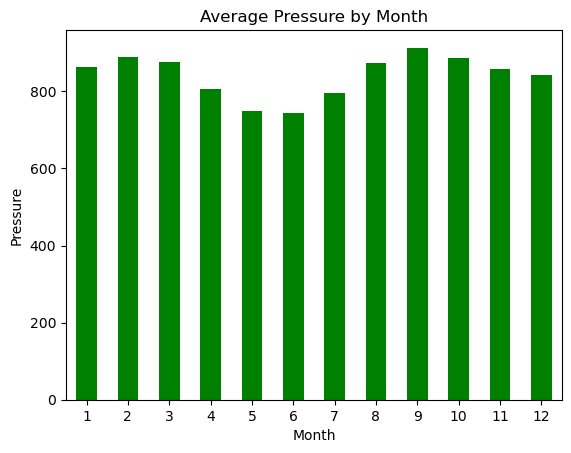

In [80]:
# Plot the average pressure by month
average_pressure_by_month.plot.bar(title="Average Pressure by Month",
                                   xlabel="Month", ylabel="Pressure",
                                   legend=False, rot=0, color="green")
plt.show()

The lowest average pressure is during the 6th month while the highest average pressure is during the 9th month.

### Days in a Martian Year

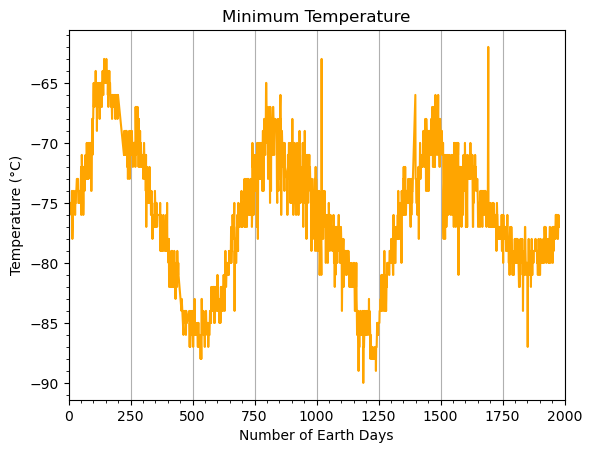

In [81]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(df["sol"], df["min_temp"], color="orange")
plt.title("Minimum Temperature")
plt.xlabel("Number of Earth Days")
plt.ylabel("Temperature (°C)")
plt.grid(True, axis='x')
plt.xlim(0, 2000)
plt.minorticks_on()
plt.show()

We can use the above graph to estimate the number of terrestrial days in a Martian year by looking at the peak-to-peak or trough-to-trough.
- Peak-to-Peak
    - `800  - 150 = 650`
    - `1500 - 800 = 700`
- Trough-to-Trough
    - `1200 - 525 = 675`

Average of all three values = **675 days**

This is very close to the actual number of  **687 Earth days**</br>
Source: [Nasa](https://mars.nasa.gov/all-about-mars/facts/mars-year/)

### Step 6: Save the Data

In [83]:
# Write the data to a CSV
df.to_csv("mars_weather.csv", header=True, index=False, date_format="%Y-%m-%d")

In [36]:
browser.quit()